<a href="https://colab.research.google.com/github/egustavo20/dataset_datascience/blob/master/Analisando_dados_de_resposta_ao_consumidor_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando dados de resposta ao consumidor e-commerce

Em meio ao avanço tecnológico acelerado em um nível absurdo, a forma de consumo modificou e nem nos demos conta de que o e-commerce, ou comércio eletrônico, refere-se às vendas pela internet mais especificamente. Virou uma realidade necessária em nossos dias, principalmente diante do cenário pandêmico que nos encontramos. Onde o modelo de negócio se consolidou, alcançando um número maior de pessoas que adotaram o formato de consumo, devido às restrições de acesso físico que atingiu praticamente todos os tipos de comércio, se fez necessário uma adaptação a um modelo que já existia, porém que não era utilizado por todos os públicos.


<img alt="Colaboratory logo" width="1.5%" src="https://image.flaticon.com/icons/png/512/174/174857.png"> by [egustavo](https://www.linkedin.com/in/elcio-gustavo-soares-de-araujo-74a22068/)

 <img alt="Colaboratory logo" width="8.5%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png"> by [Data Science na Prática 2.0](https://sigmoidal.ai)

---
<img alt="Capa" width="150.0%" src="https://image.freepik.com/fotos-gratis/caixas-de-pacote-do-produto-e-sacola-de-compras-no-carrinho-com-laptop-para-compras-on-line-e-conceito-de-entrega_38716-138.jpg">



E quando falamos de consumo, sempre teremos o ponto de satisfação do cliente, interlocução direta entre consumidores e empresas. Pois atender a expectativa do cliente garantindo a qualidade no serviço prestado, ou na entrega do produto, é o que torna a empresa competitiva no mercado. Para isso temos, áreas dedicadas com um trabalho importantíssimo de canais de reclamação, garantindo que todos os direitos do consumidor estejam sendo analisado.
<center><img alt="Analisando Airbnb" width="39%" src="https://static.wixstatic.com/media/828e1e_62325403967345d6a46dea977caf20bd~mv2.png/v1/fill/w_1275,h_456,al_c/828e1e_62325403967345d6a46dea977caf20bd~mv2.png"></center>

**Neste *notebook*, iremos analisar os dados da base de disponibilização e manutenção do [`Consumidor.gov.br`](https://consumidor.gov.br/pages/principal/?1613536289346) para compreender, e avaliar a dinamica de prestação de serviço das empresas, para suporte e reparo da insatisfação de um serviço ou produto entregue ao consumidor.**

## Obtenção de dados
Os dados foram obtidos diretamente do portal de Dados.MJ (MINISTÉRIO DA JUSTIÇA) o mesmo é acompanhado pela secretaria nacional do consumidor. Que tem como responsabilidade, promover, supervisionar e coordenar a política nacional de proteção e defesa do consumidor em âmbito nacional. 

### Importando os dados

In [206]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [207]:
#Importando o arquivo para montagem do Dataframe
colum_rnome = ['Canal_de_Origem','Região','UF','Cidade','Sexo','Faixa_Etária','Data_Abertura',
               'Data_Resposta','Prazo_Resposta','Nome_Fantasia','Área','Grupo_Problema',
               'Problema','Procurou_Empresa','Respondida','Situação']

df = pd.read_csv('/content/dataset_dados_consumidor_gov_2020_2021.csv',sep=';',encoding='cp1252',
                 usecols=[1,2,3,4,5,6,9,10,14,17,19,21,22,24,25,26],names=colum_rnome,)
df.drop(0,inplace = True)

**Dicionário das variáveis**

* `Canal_de_Origem` - Meio de acesso, plataforma utilizada para consumo.
* `Região` - Divisão regional do Brasil.
* `UF` - Divisão de estado do Brasil.
* `Cidade` - Divisão de cidades do Brasil. 
* `Sexo` - Status de genero.
* `Faixa_Etária` - Intervalo de idade.
* `Data_Abertura` - Data de abertura da notificação do consumidor.
* `Data_Resposta` - Data de resposta da empresa.
* `Prazo_Resposta` - Prazo de resposta, estipulado pela empresa.
* `Nome_Fantasia` - Nome da empresa.
* `Área` - Área de segmento da empresa.
* `Grupo_Problema` - Categoria do problema informado pelo consumidor.
* `Problema` - Subgrupo e detalhamento do problema informado pelo consumidor.
* `Procurou_Empresa` - Consumidor procurou a empresa, após abertura da notificação.
* `Respondida` - A empresa respondeu a tentativa de contato.
* `Situação` - Status de fechamento da notificação.


Após compreendermos no dicionário o resumo de cada variável, iremos mostrar as primeiras entradas do nosso dataset que é a carga consolidada do periodo de 08/2020 á 01/2021 do arquivo `consumidor.gov.br.csv` conforme informdo anteriormente. 

In [208]:
# verificando as 5 primeiras entradas do dataset
df.head()

,Canal_de_Origem,Região,UF,Cidade,Sexo,Faixa_Etária,Data_Abertura,Data_Resposta,Prazo_Resposta,Nome_Fantasia,Área,Grupo_Problema,Problema,Procurou_Empresa,Respondida,Situação
1,Plataforma IOS,N,AC,Rio Branco,M,entre 31 a 40 anos,26/06/2020,11/07/2020,11/07/2020,SKY,Telecomunicações,Cobrança / Contestação,"Negativação indevida (SPC, Serasa, SCPC etc)",N,S,Finalizada não avaliada
2,Plataforma Web,N,AC,Xapuri,M,entre 41 a 50 anos,26/06/2020,NaN,11/07/2020,Banco Industrial do Brasil (BIB),Serviços Financeiros,Atendimento / SAC,SAC - Dificuldadede de contato / acesso,N,N,Finalizada não avaliada
3,Plataforma Web,N,AC,Cruzeiro do Sul,M,entre 21 a 30 anos,26/06/2020,11/07/2020,11/07/2020,Pag!,Serviços Financeiros,Cobrança / Contestação,Renegociação / parcelamento de dívida,S,S,Finalizada não avaliada
4,Plataforma Web,N,AC,Rio Branco,F,entre 31 a 40 anos,29/06/2020,14/07/2020,14/07/2020,Banco Industrial do Brasil (BIB),Serviços Financeiros,Atendimento / SAC,SAC - Dificuldade para cancelar o serviço,S,S,Finalizada não avaliada
5,Plataforma Web,N,AC,Rio Branco,M,entre 31 a 40 anos,29/06/2020,13/07/2020,14/07/2020,Móveis Gazin,Produtos Eletrodomésticos e Eletrônicos,Cobrança / Contestação,"Negativação indevida (SPC, Serasa, SCPC etc)",S,S,Finalizada não avaliada


## Análise Inicial dos Dados
Antes de começarmos a explorar nosso dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar as dimensões do dataset.

In [209]:
# identificando o volume de dados e os tipos das variáveis

print("Variáveis: \t {}".format(df.shape[1]))
print("Entradas:  \t {} \n".format(df.shape[0]))

display(df.dtypes)

Variáveis: 	 16
Entradas:  	 732865 



Canal_de_Origem     object
Região              object
UF                  object
Cidade              object
Sexo                object
Faixa_Etária        object
Data_Abertura       object
Data_Resposta       object
Prazo_Resposta      object
Nome_Fantasia       object
Área                object
Grupo_Problema      object
Problema            object
Procurou_Empresa    object
Respondida          object
Situação            object
dtype: object

Com intuito de trabalhar as variáveis de tempo `Data_Abertura`, `Data_Resposta` e `Prazo_Resposta` será necessário converter os tipos de dados `str` para `datetime` para que mais a frente, possamos trabalhar features e obter insights importantes para nossa analise. 

In [210]:
#Trabalhando os tipos de variáveis "DATA"
df.Data_Abertura = pd.to_datetime(df.Data_Abertura,format="%d/%m/%Y")
df.Data_Resposta = pd.to_datetime(df.Data_Resposta,format="%d/%m/%Y")
df.Prazo_Resposta = pd.to_datetime(df.Prazo_Resposta,format="%d/%m/%Y")

display(df.dtypes)

Canal_de_Origem             object
Região                      object
UF                          object
Cidade                      object
Sexo                        object
Faixa_Etária                object
Data_Abertura       datetime64[ns]
Data_Resposta       datetime64[ns]
Prazo_Resposta      datetime64[ns]
Nome_Fantasia               object
Área                        object
Grupo_Problema              object
Problema                    object
Procurou_Empresa            object
Respondida                  object
Situação                    object
dtype: object

Para compreender melhor as entradas do dataset, precisamos identificar a existência de valores nulos, buscando minimizar esses gaps caso exista, pois eles podem distorcer as nossas análises por consequência de falta de informação.

In [211]:
 # Em ordem decrescente as variáveis por seus valores ausentes

 (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Data_Resposta       9.774788
Prazo_Resposta      0.829621
Canal_de_Origem     0.829621
Sexo                0.003138
Situação            0.000000
Respondida          0.000000
Procurou_Empresa    0.000000
Problema            0.000000
Grupo_Problema      0.000000
Área                0.000000
Nome_Fantasia       0.000000
Data_Abertura       0.000000
Faixa_Etária        0.000000
Cidade              0.000000
UF                  0.000000
Região              0.000000
dtype: float64

Observando o percentual de valores nulos acima, podemos concluir que existi uma concentração pequena de valores nulos em 9,8% para os campos de data de resposta. Porém trata-se de uma informação relevante, dos status das respostas que ficaram em aberto sem ter devolutiva da parte das empresas, desta forma manteremos esses valores nulos. Quanto as variáveis `Canal_de_Origem` e `Sexo` ainda que tiveram uma discreta presença de valores ausentes, iremos tratar com o método de frequência, que é muito utilizado para evitar a perda de dados.

In [212]:
# Prenchimento e tratamento de valores ausentes com metodo de frequência
print(df.Sexo.value_counts(),"\n")
df.Sexo.fillna("M",inplace=True)

print(df.Canal_de_Origem.value_counts())
df.Canal_de_Origem.fillna("Plataforma Web",inplace=True)

M    406368
F    326138
O       336
Name: Sexo, dtype: int64 

Plataforma Web        710038
Plataforma Android     14099
Plataforma IOS          2648
Name: Canal_de_Origem, dtype: int64


In [213]:
# Em ordem decrescente valores ausentes após tratamento
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Data_Resposta       9.774788
Prazo_Resposta      0.829621
Situação            0.000000
Respondida          0.000000
Procurou_Empresa    0.000000
Problema            0.000000
Grupo_Problema      0.000000
Área                0.000000
Nome_Fantasia       0.000000
Data_Abertura       0.000000
Faixa_Etária        0.000000
Sexo                0.000000
Cidade              0.000000
UF                  0.000000
Região              0.000000
Canal_de_Origem     0.000000
dtype: float64

Nesta etapa como previsto iremos montar `New_features` com as variáveis de tempo, pois como a proposta da analise é compreender a dinâmica de trativa das empresas para solucionar insatisfação do consumidor, de forma rápida e no prazo, tomaremos como indicador a seguintes equações de diferença e aderência:


* *Difer* = ${\text{(Prazo_Resposta - Data_Abertura) -}}  {\text{ (Data_Resposta - Data_Abertura)}}$


 * *Aderência(%)* = $\frac{\text{Difer}}{\text{Dias_prev_resposta}}$*100

In [214]:
#Features para acompanhamento de prazo em dias
df["Dias_resposta"] = df.Data_Resposta.dt.day - df.Data_Abertura.dt.day
df["Dias_prev_resposta"] = df.Prazo_Resposta.dt.day - df.Data_Abertura.dt.day

In [215]:
#Equações para montagem do KPI
df["Difer"] =  df.Dias_prev_resposta - df.Dias_resposta
df["Aderência(%)"] = (df.Difer/df.Dias_prev_resposta)*100
df["Aderência(%)"] = df['Aderência(%)'].replace(0,100)
df['Aderência(%)'] = df['Aderência(%)'].apply(lambda x:100 if x > 100 else x)
df['Aderência(%)'] = df['Aderência(%)'].apply(lambda x:0 if x < 0 else x)

Para que possamos ter uma visão macro da distribuição desses dados, iremos plotar um histograma.

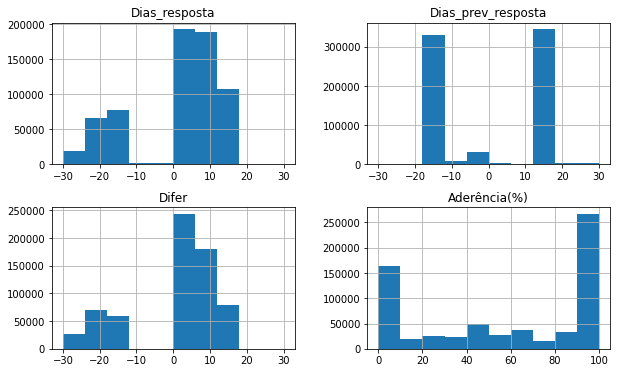

In [217]:
#Plotando gráfico de histograma
df.hist(figsize=(10,6));

Com uma breve análise da distribuição das variáveis que foram criadas com intuito de medir o tempo, temos uma primeira impressão de que as frequências não possuem presença de outliers. Porém validaremos, com uma investigação estatística mais a fundo antes de entrar na etapa de análise.

##A investigação estatistica será dividida em duas etapas
* **_*Primeira etapa*_** -> Visão geral estatistica através da função `describe` para as variáveis que fazem parte do KPI.

* **_*Segunda  etapa*_** -> Gráfico de `boxplot`para as variáveis que seja necessário visiualizar os intervalos de outliers.

In [218]:
#Primeira etapa
df.describe()

,Dias_resposta,Dias_prev_resposta,Difer,Aderência(%)
count,661229.000000,726785.000000,661229.000000,661119.000000
mean,0.401821,0.065318,-0.323963,57.669291
std,12.420155,15.009613,12.097162,41.003706
min,-30.000000,-30.000000,-30.000000,0.000000
25%,-9.000000,-16.000000,0.000000,13.333333
50%,4.000000,-1.000000,3.000000,66.666667
75%,9.000000,15.000000,8.000000,100.000000
max,30.000000,30.000000,30.000000,100.000000


O resumo estatístico acima, nos permite validar alguns pontos para cada variável:

*  Para os `Dias_resposta` temos uma maior concentração de **75%** dos dados, a média de respostas em **9 dias** comparando a média dos `Dias_prev_resposta` que tem maior concentração de distribuição de dados para **15 dias**. Podemos dizer que a maior parte das repostas, tendem a serem atendidas dentro do prazo estipulado, com **6 dias de antecedêndia do prazo** que foi passado para o consumidor.

*  Agora olhando para a `Dif` que é a diferença de dias entre o prazo estimado pela empresa, com a resposta em efetivo, temos pontos de atenção para **possibilidade de atraso na resposta em 30 dias**, ou uma supresa na devolutiva com antecedência de resposta em **30 dias para longo prazo**.

*  Para o nosso KPI de `Aderência(%)` podemos ver que com **75%** das respostas com a performance em **100%** podemos considerar que boa parte dos prazos tendem a ser respondidos dentro do prazo com antecedência ao prazo estimado.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


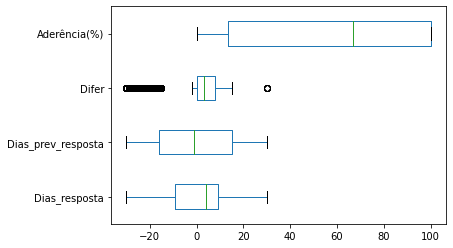

In [219]:
#Segunda etapa
df.plot(kind='box', vert= False)
plt.show()

Como podemos observar, a maior variação de distribuição em outliers está centralizado em `Dif` para trabalharmos, essa distribuição iremos plotar novo `boxplot` para vizualizar a proporção desses valores fora de serie.

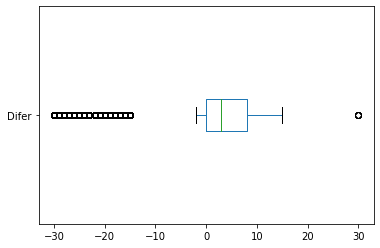


18470 entradas inferior 25 dias
representando 2.5202% dos dados


In [220]:
#Segunda etapa
df.Difer.plot(kind= 'box', vert= False)
plt.show()

print("\n{} entradas inferior 25 dias".format(len(df.loc[df.Difer<-25])))
print("representando {:.4f}% dos dados".format(len(df.loc[df.Difer<-25])/df.shape[0]*100))


Considerando que dentro de cada mês temos 4 domingos, que normalmente não são dias trabalhados e acabam distorcendo o período de resposta, e consequentemente a diferença entre o prazo preestabelecido para a devolutiva da empresa. Iremos desconsiderar esses pontos acima de 25 dias, que conforme a análise estatística se enquadram como valores fora de série tanto para o limite superior, como o inferior.

**Histogramas sem outliers**



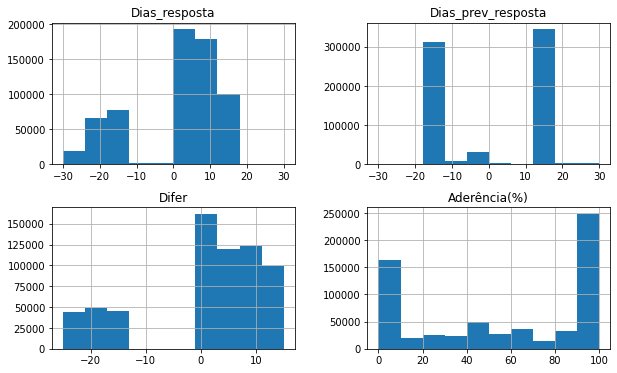

In [221]:
# remover os *outliers* em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Difer<-25].index,axis= 0, inplace=True)
df_clean.drop(df_clean[df_clean.Difer>25].index,axis= 0, inplace=True)


# plotando histograma para as variáveis após limpeza dos outliers
df_clean.hist(figsize=(10,6));

##Correlacionando as váriaveis 
Para identificar a interpretação do nosso KPI `Aderência (%)` iremos plotar uma matriz de correlação, buscando o racional correto de utilização para que possamos replicar a régua em nossas análises.

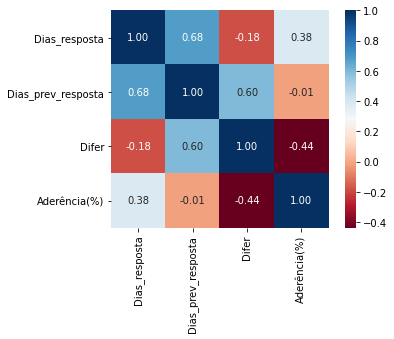

In [222]:
corr = df_clean.corr()

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White',annot=True);

Quando analisamos os fatores de correlação conforme a matriz acima, podemos ver que os `Dias_resposta` é inversamente prporcional ao `Difer` concluindo que, todas as vezes que o tempo de resposta se prolonga, temos uma redução na diferença de dias restantes para o prazo previsto. Mostrando no meio do termometro `Aderência (%)` que por sua vez tende ilustrar que quanto mais rapido a resposta, maior é a intensidade do meu valor de aderência. 

# Medindo a média de aderência (%) de respostas das empresas em função do tempo
Vamos dedicar essa seção do projeto para iniciar a analise dos dados. Para a interpretação desse indicador temos como orientação conforme validado anteriormente, que **quanto maior o percentual melhor**, pois sabemos que a medida que a devolutiva da **resposta ao consumidor é rápida**, maior é a proporção com o tempo de dias que estava previsto. E o oposto para o **percentual menor**, pois significa que o **intervalo de resposta demorou mais**, e entre os dias restantes com o tempo de dias que estava previsto diminuindo, menor sera a proporção de aderência ao prazo preestabelecido.

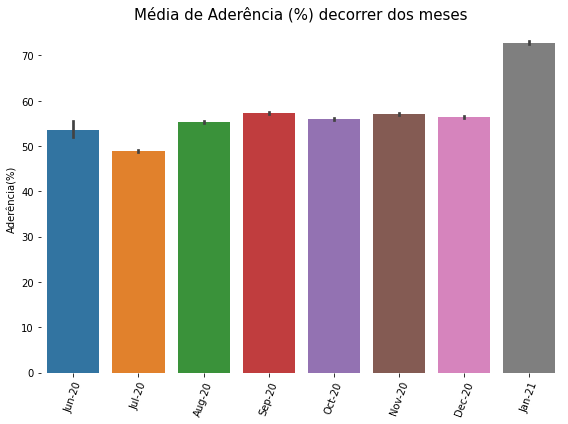



Data_Abertura
Jun-20    53.635709
Jul-20    48.905736
Aug-20    55.347648
Sep-20    57.351897
Oct-20    56.050773
Nov-20    57.030977
Dec-20    56.427908
Jan-21    72.804661
Name: Aderência(%), dtype: float64


In [223]:
Mês = pd.to_datetime(df_clean.Data_Abertura).dt.strftime('%b-%y')
Media = df_clean['Aderência(%)']

fig, ax= plt.subplots(figsize=(8,6))
sns.barplot(x= Mês, y= Media, ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlabel("")

plt.title("Média de Aderência (%) decorrer dos meses", fontsize=15)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

print("\n")
print(df_clean.groupby(Mês,sort=False)['Aderência(%)'].mean())


###Identificando a linha média de criticidade para aderência
Vamos encontrar o valor médio para aderência, para que possamos utilizar como ponto de corte quem está abaixo da média.

In [328]:
#Média de aderência de respostas das empresas
PER = df_clean['Aderência(%)'].mean()//1

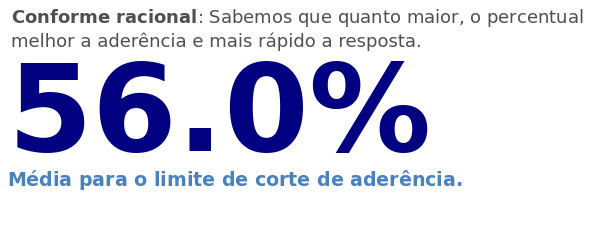

In [340]:
BLUE2, BLUE1, BLUE3 = '#4A81BF','#000080','#4F4F4F'

#Texto 1 central
plt.text(-0.15, 0.41,
         '$\\bf{\}$'+str(PER)+"%", # use mathtext \\bf for bold text
         fontsize=122,
         color=BLUE1)

#Sub-texto 1
plt.text(-0.14, 0.89,
         '$\\bf{Conforme\ racional}$: Sabemos que quanto maior, o percentual\n'
         'melhor a aderência e mais rápido a resposta.',
         fontsize=18,
         color=BLUE3)

#Sub-texto 2
plt.text(-0.15, 0.25,
         # use mathtext \\bf for bold text
         '$\\bf{Média\ para\ o\ limite\ de\ corte\ de\ aderência.}$',
         fontsize=19,
         color=BLUE2)

#  remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

# remover bordas
for spine in plt.gca().spines.values():
    spine.set_visible(False)


### Compreendendo o cenário regional quanto aos menores valores médios de aderência (%) de respostas das empresas
Para avaliar as variações de atendimento ao consumidor em nível regional, utilizamos a nossa régua de aderência para compreender quais as regiões possuem maior fragilidade quanto a suporte para insatisfação do consumidor.



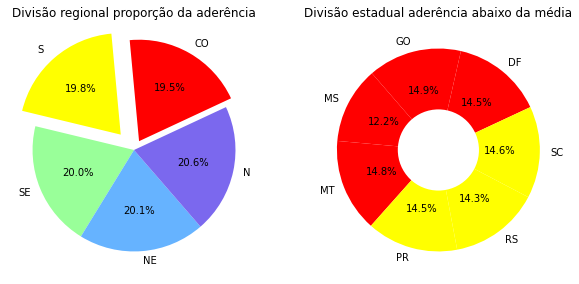

Região
CO    55.259939
S     55.907089
SE    56.601418
NE    56.980940
N     58.219464
Name: Aderência(%), dtype: float64 


Região  UF
CO      DF    55.900375
        GO    57.577342
        MS    47.131615
        MT    57.282062
S       PR    56.090250
        RS    55.333703
        SC    56.460339
Name: Aderência(%), dtype: float64


In [266]:
#Plotando os graficos de rosca com matplot

fig, (ax1, ax2)= plt.subplots(1,2,figsize=(10,5))

colors = ['#FF0000', '#FFFF00', '#99ff99', '#66b3ff','#7B68EE']
colors2 = ['#FF0000', '#FF0000', '#FF0000', '#FF0000','#FFFF00','#FFFF00','#FFFF00']

explode = (0.1,0.2,0,0, 0)
explode2 = (0,0,0,0, 0,0,0)

a = df_clean.groupby('Região')['Aderência(%)'].mean().sort_values(ascending=
True)
b = df_clean[(df_clean['Região']=="S ") | (df_clean['Região']=="CO") ]
b= b.groupby(['UF','Região'][0])['Aderência(%)'].mean().sort_values(ascending=
True)[0:7]
b.sort_index(level='Região',inplace=True)


ax1.pie(a,labels=dict(a).keys(),explode=explode,autopct='%1.1f%%',colors=colors,startangle=25)
ax2.pie(b,labels=dict(b).keys(),explode=explode2,autopct='%1.1f%%',colors=colors2,startangle=25)


ax1.set_title("Divisão regional proporção da aderência")
ax2.set_title("Divisão estadual aderência abaixo da média")


centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

centre_circle = plt.Circle((1,5),0.4,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

print(df_clean.groupby('Região')['Aderência(%)'].mean().sort_values(ascending=True),"\n\n")


c = df_clean[(df_clean['Região']=="S ") | (df_clean['Região']=="CO") ]
c= c.groupby(['Região','UF'])['Aderência(%)'].mean().sort_values(ascending=
True)[0:7]
c.sort_index(level='Região',inplace=True)
print(c)



###Conclusões de distribuição regional:

* Na analise do gráfico acima, podemos ver que a concentração regional possui duas areas com média de aderência(%) abaixo da média de 56% são as regiões `Centro-Oeste (CO)` e `Sul (S)` com representatividade de 39,3% para valores fora da média.

* E quando estratificamos essas duas regiões em nivel estadual, temos a média mais baixa no centro oeste para `Mato Grosso do Sul (MS)` com 47% de aderência nas tratativas de problemas de seus consumidores, puxando a média para baixo junto com `Distrito Federal (DF)`. E olhando para o sul temos o estado de `Rio Grande do Sul (RS)` puxando a média para baixo com 55% de aderência.

### Contagem de notificações em faixa etária para regiões abaixo da média de aderência(%)

Nessa etapa será contabilizado, a divisão por faixa etária para as regiões que apresentam valores de média de aderência(%) abaixo do ponto de corte.


 Proporção de notificações por faixa etária (Regiões CO e S):

entre 31 a 40 anos    29.675060
entre 21 a 30 anos    23.563529
entre 41 a 50 anos    16.744119
entre 51 a 60 anos    12.247830
entre 61 a 70 anos    10.815862
mais de 70 anos        5.315844
até 20 anos            1.637757
Name: Faixa_Etária, dtype: float64 




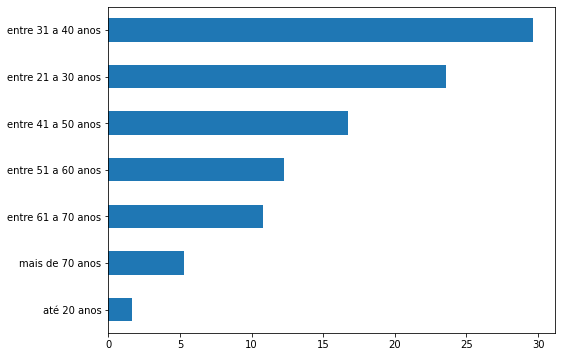

In [345]:
#Registros de notificações por faixa etária

age = df_clean[(df_clean['Região']=="S ") | (df_clean['Região']=="CO") ]
(age.Faixa_Etária.value_counts(ascending=True)/age.shape[0]*100).plot.barh(figsize=(8,6))


print("\n Proporção de notificações por faixa etária (Regiões CO e S):\n")
print(age.Faixa_Etária.value_counts()/age.shape[0]*100,"\n\n")


### Etapa de estratificação dos problemas notificados (Quantidade e representatividade percentual)

Iremos estratificar os problemas, quantificando a recorrência de registro aberto pelos consumidores da regiões `Centro-Oeste (CO)` e `Sul (S)` para dar mais profundidade, nos tipos de ocorrências que impactam a média de aderência da região.

In [402]:
# Estratificação em grupo por quantidade, referenciando o percentual de representatividade por ocorrências
ramo = df_clean[(df_clean['Região']=="S ") | (df_clean['Região']=="CO") ]

print("\n Estratificando notificações por categoria de problema (Representatividade %):\n")
print(ramo.Área.value_counts()/ramo.shape[0]*100,"\n\n")


 Estratificando notificações por categoria de problema (Representatividade %):

Serviços Financeiros                       41.087125
Telecomunicações                           23.929626
Produtos de Telefonia e Informática         6.924331
Demais Produtos                             6.711787
Transportes                                 5.154184
Demais Serviços                             5.115908
Produtos Eletrodomésticos e Eletrônicos     4.122987
Turismo/Viagens                             2.664001
Água, Energia, Gás                          2.529810
Saúde                                       0.774073
Educação                                    0.598455
Alimentos                                   0.313412
Habitação                                   0.074300
Name: Área, dtype: float64 




Nessa breve analise, o problema está centralizado entre os 80% nas categorias `Serviços Financeiros`e `Telecomunicações` com o maior volume de ocorrências. Iremos descer a segunda camada para visualizar os grupos de problema.

In [425]:
# Estratificação em grupo por quantidade, referenciando o percentual de representatividade por ocorrências

grupo_p = df_clean[(df_clean['Região']=="S ") | (df_clean['Região']=="CO")]
grupo_pr = grupo_p[(grupo_p['Área']=="Serviços Financeiros") | (grupo_p['Área']=="Telecomunicações")]

print("\n Estratificando notificações por sub-grupo de problema (Representatividade %):\n")
print(grupo_pr.Grupo_Problema.value_counts()/grupo_pr.shape[0]*100,"\n\n")


 Estratificando notificações por sub-grupo de problema (Representatividade %):

Cobrança / Contestação    43.307430
Contrato / Oferta         23.654283
Atendimento / SAC         13.045074
Vício de Qualidade        11.799091
Informação                 7.688525
Entrega do Produto         0.458500
Saúde e Segurança          0.047097
Name: Grupo_Problema, dtype: float64 




Na segunda camada com o maior peso carregando 40% do grupo de problemas, temos `Cobrança / Contestação` e fechando os 80% em seguida fica `Contrato / Oferta` ,  `Contrato / Oferta` e `Vício de Qualidade`. Se observarmos bem trata-se de um conjunto de atividades de rotina de sistema de telefonia e rede bancaria com serviços de credito. Para validar a hipotese, iremos descer a terceira camada procurando as top 10 empresas com mais notificações.

In [426]:
# Estratificação em grupo por quantidade, referenciando o percentual de representatividade por ocorrências
empresa = grupo_pr[(grupo_pr['Grupo_Problema']=="Cobrança / Contestação") | (grupo_pr['Grupo_Problema']=="Contrato / Oferta") | (grupo_pr['Grupo_Problema']=="Atendimento / SAC")| (grupo_pr['Grupo_Problema']=="Vício de Qualidade") ]

print("\n Estratificando notificações por empresa (Representatividade %):\n")
print((empresa.Nome_Fantasia.value_counts()/empresa.shape[0]*100).sort_values(ascending=False)[:10],"\n\n")



 Estratificando notificações por empresa (Representatividade %):

Vivo - Telefônica          10.921669
Tim                         5.799944
Caixa Econômica Federal     5.453668
Claro Celular               4.927086
Oi Fixo                     4.894646
Banco BMG                   3.756988
Banco Pan                   3.606105
NET                         3.348849
Mercado Pago                2.525028
Oi Celular                  2.448832
Name: Nome_Fantasia, dtype: float64 




Confirmando a hipotese, temos uma grande concentração de notificações para empresas de telefonia e serviços de credito bancario.

##Conclusão

Esse projeto de análise de dados para resposta ao consumidor e-commerce, nos mostra que existe uma gestão para insatisfação do consumidor que realizou a aquisição de algum serviço ou produto. E que entre regiões possuímos, diferentes níveis de serviço, podendo ser melhor ou pior no que tange a atenção e preocupação com o cliente. Pois no estudo podemos observar, maior engajamento nas regiões Norte, Nordeste e Sudeste para garantir que os problemas do consumidor sejam resolvidos o quanto antes. Diferente de regiões que possuem boa infraestrutura, e alta movimentação econômica, como o caso da região Sul e Centro Oeste que estatisticamente, mostrou fragilidades quanto aos canais de atendimento ao consumidor com aderência média para devolutiva de soluções inferior a 56% com concentração entre as áreas de telefonia, e rede bancária com serviços de crédito.
O intuito desse projeto, foi realizar uma análise exploratória de dados com conceitos fundamentados em ciência de dados. Pois conhecer os dados, e manipulá-los para obter insights como alguns que extraímos nas análises acima, entendendo o verdadeiro ponto onde devemos atuar, pode mudar a perspectiva do negócio e alavancar resultados para aumentar a receita e alcançar resultados.

